In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
train_x = train_x.reshape((len(train_x), np.prod(train_x.shape[1:])))
test_x = test_x.reshape((len(test_x), np.prod(test_x.shape[1:])))

print (train_x.shape)
print (test_x.shape)

(60000, 784)
(10000, 784)


In [5]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x) # train_x.astype('float32') / 255.
test_x = scaler.fit_transform(test_x) # test_x = test_x.astype('float32') / 255.

print (train_x.shape)
print (test_x.shape)

(60000, 784)
(10000, 784)


In [6]:
train_x = train_x[:6000]
train_y = train_y[:6000]

test_x = test_x[:1000]
test_y = test_y[:1000]

print (train_x.shape)
print (train_y.shape)
print (test_x.shape)
print (test_y.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


In [7]:
df_train_x = pd.DataFrame(train_x)
df_test_x = pd.DataFrame(test_x)

df_train_y = pd.DataFrame(data=train_y, columns=['class'])
df_test_y = pd.DataFrame(data=test_y, columns=['class'])

In [8]:
df_train = pd.concat([df_train_y, df_train_x], axis=1)
df_test = pd.concat([df_test_y, df_test_x], axis=1)

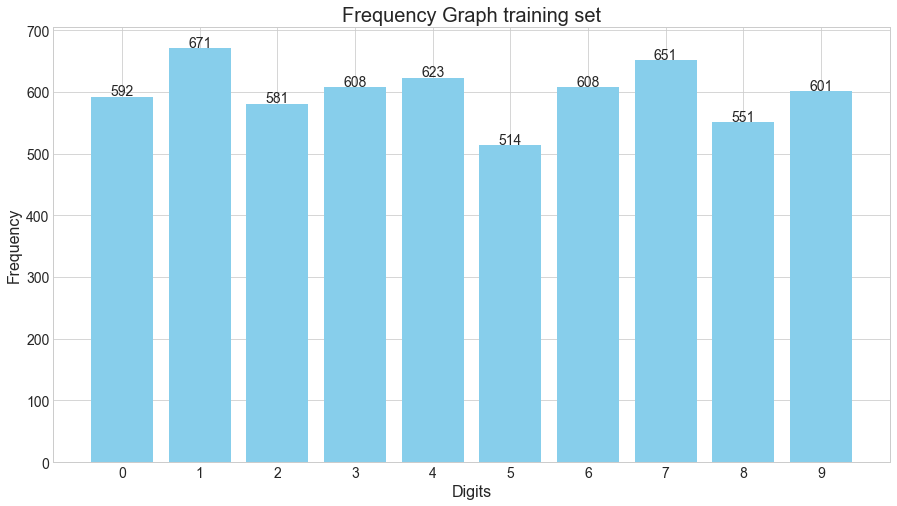

In [9]:
counts = df_train.groupby('class')['class'].count()

# counts
fig = plt.figure(figsize=(15, 8))
fig.add_subplot(111)

plt.bar(counts.index, counts.values, width=0.8, color='skyblue')
for i in counts.index:
    plt.text(i, counts.values[i] + 2, str(counts.values[i]),
             horizontalalignment='center', fontsize=14)

plt.tick_params(labelsize=14)
plt.xticks(counts.index)
plt.xlabel('Digits', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Frequency Graph training set', fontsize=20)
plt.show()

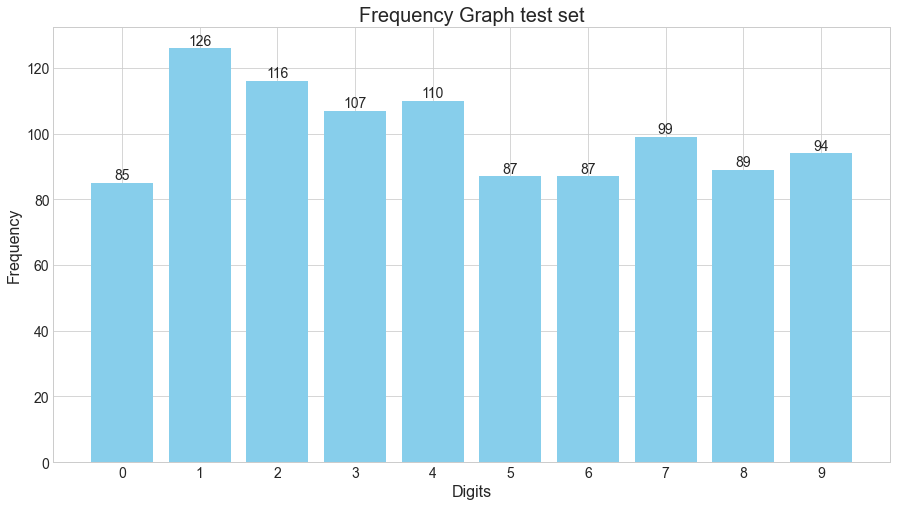

In [10]:
counts = df_test.groupby('class')['class'].count()

fig = plt.figure(figsize=(15, 8))
fig.add_subplot(111)

plt.bar(counts.index, counts.values, width=0.8, color='skyblue')
for i in counts.index:
    plt.text(i, counts.values[i] + 1, str(counts.values[i]),
             horizontalalignment='center', fontsize=14)

plt.tick_params(labelsize=14)
plt.xticks(counts.index)
plt.xlabel('Digits', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Frequency Graph test set', fontsize=20)
plt.show()

In [11]:
class KNN(object):
    def __init__(self, k):
        self.k = k
        
    def fit(self, x, y):
        self.train_x = x
        self.train_y = y
        
    def predict(self, test_x):
        num_test = test_x.shape[0]
        num_train = self.train_x.shape[0]
        euc_dis = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train): # get distances
                euc_dis[i,j] = np.sqrt(np.sum((test_x[i] - self.train_x[j])**2))
        
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            y_indices = np.argsort(euc_dis[i,:])
            y_closest = self.train_y[y_indices[:self.k]]
            y_pred[i] = np.argmax(np.bincount(y_closest))
            
        return y_pred

In [12]:
from sklearn.metrics import classification_report

Accuracy with k = 1: 90.4%

Classification Report

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        85
           1       0.91      0.99      0.95       126
           2       0.97      0.88      0.92       116
           3       0.91      0.86      0.88       107
           4       0.91      0.88      0.89       110
           5       0.90      0.90      0.90        87
           6       0.92      0.97      0.94        87
           7       0.87      0.91      0.89        99
           8       0.90      0.79      0.84        89
           9       0.83      0.86      0.84        94

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



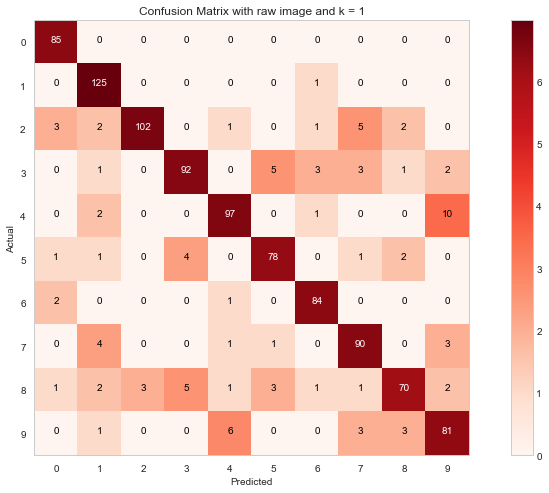

Accuracy with k = 5: 91.60000000000001%

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        85
           1       0.89      1.00      0.94       126
           2       0.99      0.84      0.91       116
           3       0.95      0.92      0.93       107
           4       0.92      0.90      0.91       110
           5       0.93      0.93      0.93        87
           6       0.89      0.97      0.93        87
           7       0.90      0.90      0.90        99
           8       0.93      0.80      0.86        89
           9       0.85      0.93      0.89        94

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.91      1000
weighted avg       0.92      0.92      0.92      1000



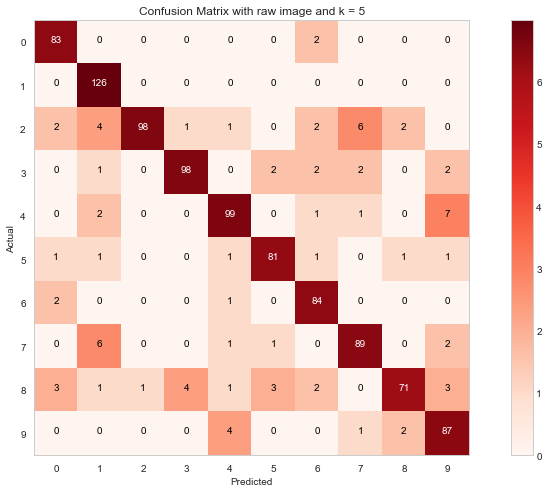

Accuracy with k = 10: 90.60000000000001%

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        85
           1       0.82      1.00      0.90       126
           2       1.00      0.74      0.85       116
           3       0.93      0.91      0.92       107
           4       0.93      0.92      0.92       110
           5       0.96      0.91      0.93        87
           6       0.92      0.95      0.94        87
           7       0.85      0.92      0.88        99
           8       0.95      0.82      0.88        89
           9       0.89      0.91      0.90        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



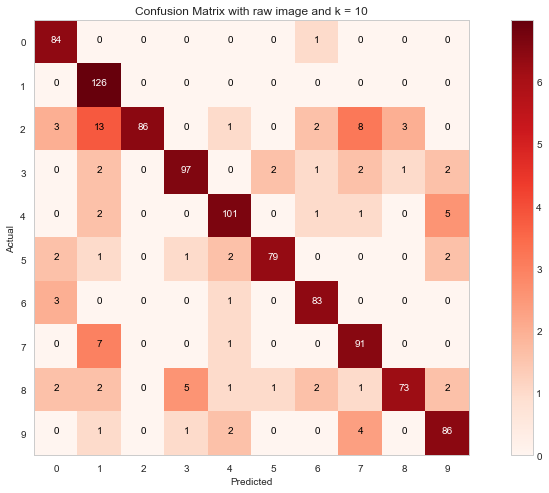

In [13]:
k_values = [1, 5, 10] # raw image
for K in k_values:
    knn = KNN(k=K)
    knn.fit(train_x, train_y)
    test_y_pred = knn.predict(test_x)

    num_correct = np.sum(test_y_pred == test_y)
    accuracy = float(num_correct) / test_y.shape[0]

    print('Accuracy with k = {}: {}%\n'.format(K, accuracy*100))
    
    print ('Classification Report\n')
    print(classification_report(df_test_y, test_y_pred))
    
    confusion_matrix = np.zeros([10, 10])
    for i in range(test_x.shape[0]):
        confusion_matrix[int(test_y[i]), int(test_y_pred[i])] += 1
    
    fig = plt.figure(figsize=(15, 8))
    fig.add_subplot(111)

    labels = [i for i in range(10)]
    plt.imshow(np.log2(confusion_matrix + 1), cmap='Reds')
    plt.colorbar()
    plt.tick_params(size=5, color='white')
    plt.xticks(np.arange(0, 10), labels)
    plt.yticks(np.arange(0, 10), labels)

    threshold = confusion_matrix.max() / 2 

    for i in range(10):
        for j in range(10):
            plt.text(j, i, int(confusion_matrix[i, j]), horizontalalignment='center',
                     color='white' if confusion_matrix[i, j] > threshold else 'black')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix with raw image and k = {}'.format(K))
    plt.grid(False)
    plt.show()

2 dim eigenspaces

Accuracy with k = 1: 8.00%

Classification Report

              precision    recall  f1-score   support

           0       0.29      0.22      0.25        85
           1       0.20      0.02      0.04       126
           2       0.06      0.05      0.05       116
           3       0.03      0.05      0.04       107
           4       0.04      0.03      0.03       110
           5       0.09      0.09      0.09        87
           6       0.12      0.20      0.15        87
           7       0.02      0.03      0.02        99
           8       0.13      0.17      0.15        89
           9       0.01      0.01      0.01        94

    accuracy                           0.08      1000
   macro avg       0.10      0.09      0.08      1000
weighted avg       0.10      0.08      0.08      1000



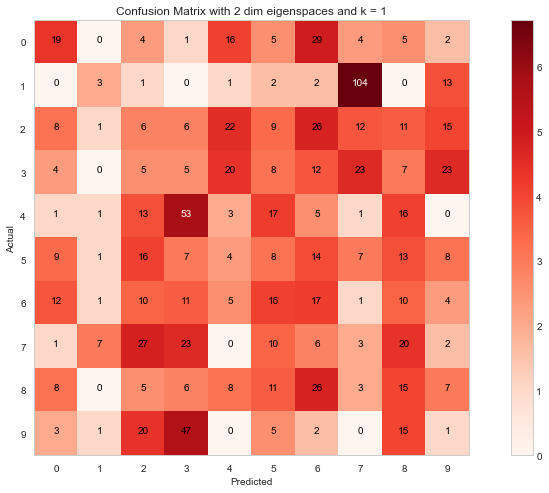

Accuracy with k = 5: 7.80%

Classification Report

              precision    recall  f1-score   support

           0       0.26      0.22      0.24        85
           1       0.26      0.05      0.08       126
           2       0.06      0.07      0.06       116
           3       0.01      0.02      0.01       107
           4       0.01      0.01      0.01       110
           5       0.16      0.10      0.12        87
           6       0.13      0.23      0.16        87
           7       0.01      0.01      0.01        99
           8       0.16      0.13      0.14        89
           9       0.00      0.00      0.00        94

    accuracy                           0.08      1000
   macro avg       0.10      0.08      0.08      1000
weighted avg       0.10      0.08      0.08      1000



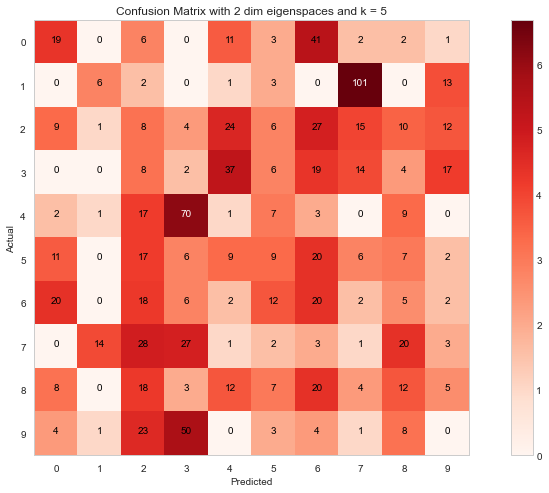

Accuracy with k = 10: 8.20%

Classification Report

              precision    recall  f1-score   support

           0       0.27      0.18      0.21        85
           1       0.23      0.04      0.07       126
           2       0.06      0.05      0.05       116
           3       0.01      0.02      0.01       107
           4       0.02      0.02      0.02       110
           5       0.15      0.10      0.12        87
           6       0.15      0.32      0.20        87
           7       0.02      0.03      0.03        99
           8       0.12      0.13      0.13        89
           9       0.00      0.00      0.00        94

    accuracy                           0.08      1000
   macro avg       0.10      0.09      0.08      1000
weighted avg       0.10      0.08      0.08      1000



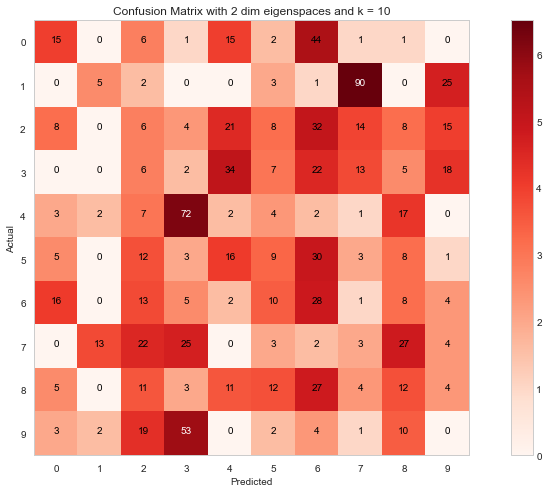


7 dim eigenspaces

Accuracy with k = 1: 9.70%

Classification Report

              precision    recall  f1-score   support

           0       0.51      0.39      0.44        85
           1       0.19      0.02      0.04       126
           2       0.04      0.05      0.05       116
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00       110
           5       0.15      0.21      0.17        87
           6       0.25      0.20      0.22        87
           7       0.13      0.11      0.12        99
           8       0.09      0.10      0.09        89
           9       0.00      0.00      0.00        94

    accuracy                           0.10      1000
   macro avg       0.14      0.11      0.11      1000
weighted avg       0.13      0.10      0.10      1000



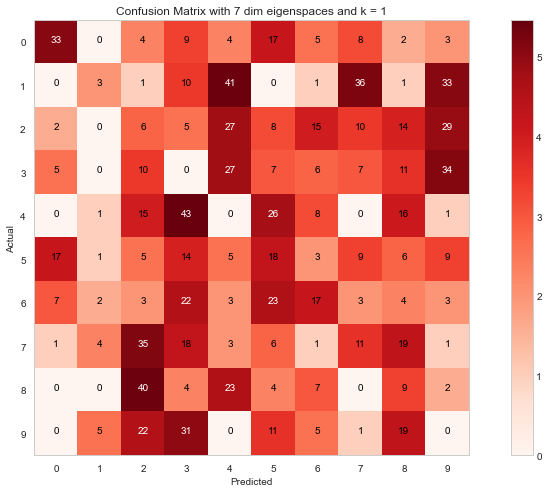

Accuracy with k = 5: 12.40%

Classification Report

              precision    recall  f1-score   support

           0       0.54      0.53      0.54        85
           1       0.38      0.04      0.07       126
           2       0.06      0.08      0.07       116
           3       0.00      0.00      0.00       107
           4       0.01      0.01      0.01       110
           5       0.19      0.23      0.21        87
           6       0.32      0.28      0.29        87
           7       0.14      0.13      0.13        99
           8       0.09      0.08      0.08        89
           9       0.00      0.00      0.00        94

    accuracy                           0.12      1000
   macro avg       0.17      0.14      0.14      1000
weighted avg       0.17      0.12      0.13      1000



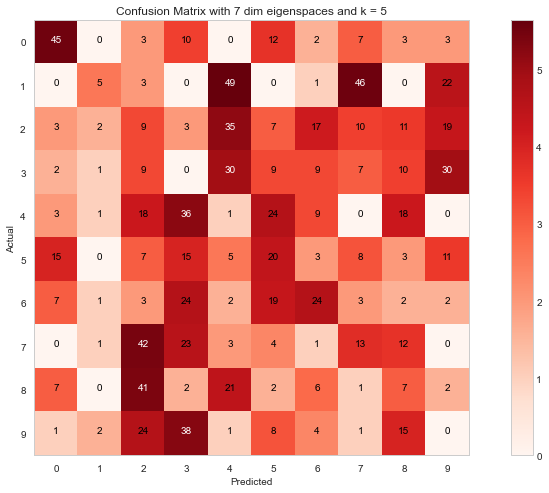

Accuracy with k = 10: 12.60%

Classification Report

              precision    recall  f1-score   support

           0       0.56      0.51      0.53        85
           1       0.43      0.05      0.09       126
           2       0.05      0.07      0.06       116
           3       0.00      0.00      0.00       107
           4       0.01      0.01      0.01       110
           5       0.23      0.28      0.25        87
           6       0.33      0.31      0.32        87
           7       0.10      0.10      0.10        99
           8       0.08      0.08      0.08        89
           9       0.00      0.00      0.00        94

    accuracy                           0.13      1000
   macro avg       0.18      0.14      0.14      1000
weighted avg       0.17      0.13      0.13      1000



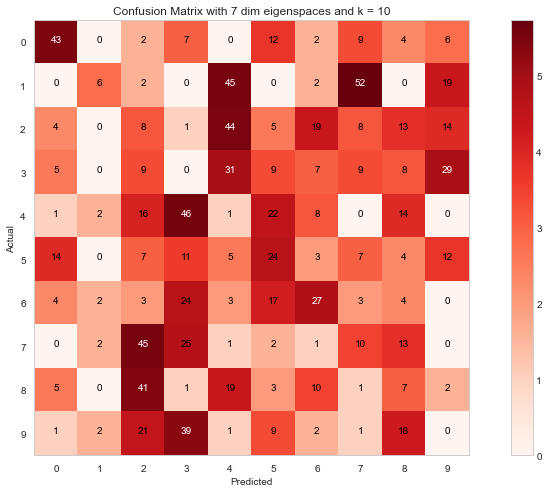

In [16]:
for d in [2, 7]: # 2, 7 dim eigenspaces, respectively
    try:
        pca = PCA(n_components=d, svd_solver='full')
        reduced_train_x = pca.fit_transform(df_train_x)
        reduced_test_x = pca.fit_transform(df_test_x)

    except:
        pca = PCA(n_components=d)
        reduced_train_x = pca.fit_transform(df_train_x)
        reduced_test_x = pca.fit_transform(df_test_x)
    
    print(pca.n_components_, 'dim eigenspaces\n')
    
    for K in k_values:
        knn = KNN(k=K)
        knn.fit(reduced_train_x, train_y)
        test_y_pred = knn.predict(reduced_test_x)

        num_correct = np.sum(test_y_pred == test_y)
        accuracy = float(num_correct) / test_y.shape[0]

        print('Accuracy with k = {}: {:.2f}%\n'.format(K, accuracy*100))
        
        print ('Classification Report\n')
        print(classification_report(df_test_y, test_y_pred))

        confusion_matrix = np.zeros([10, 10])
        for i in range(test_x.shape[0]):
            confusion_matrix[int(test_y[i]), int(test_y_pred[i])] += 1

        fig = plt.figure(figsize=(15, 8))
        fig.add_subplot(111)

        labels = [i for i in range(10)]
        plt.imshow(np.log2(confusion_matrix + 1), cmap='Reds')
        plt.colorbar()
        plt.tick_params(size=5, color='white')
        plt.xticks(np.arange(0, 10), labels)
        plt.yticks(np.arange(0, 10), labels)

        threshold = confusion_matrix.max() / 2 

        for i in range(10):
            for j in range(10):
                plt.text(j, i, int(confusion_matrix[i, j]), horizontalalignment='center',
                         color='white' if confusion_matrix[i, j] > threshold else 'black')

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix with {} dim eigenspaces and k = {}'.format(d, K))
        plt.grid(False)
        plt.show()
    
    print()